<a href="https://colab.research.google.com/github/Vags18/Internship--University_Of_Belgrade_Serbia/blob/main/UoB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Extraction through API

In [ ]:
import pandas as pd
import json
import requests

In [ ]:
res_api=requests.get('https://crowdsensing.elab.fon.bg.ac.rs/api/data-protected/f0b15414a63813e2d7f29e53d5d8d68d?page=1&limit=10000&from=2019-05-08&to=2019-05-29',verify=False)
print(res_api.status_code)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200


In [ ]:
resobj=res_api.json()

In [ ]:
keys=["_id","datetime","mac","lat","lon"]
df_lst=[]

for data in resobj:
  raw_dict={}
  for key in keys:
    raw_dict[key]=data[key]
  lst=[]
  lst.append(raw_dict)
  df1=pd.DataFrame(lst)
  analstr=data["analysis"]
  filtered_str=",".join(analstr.split("},{"))
  analobj=json.loads(filtered_str)
  df2=pd.DataFrame(analobj)
  df_lst.append(pd.concat([df1,df2],axis=1,join='inner'))

df=pd.concat(df_lst,ignore_index=True)
df

,_id,datetime,mac,lat,lon,0,5,10,15,20,...,3150,3155,3160,3165,3170,3175,3180,3185,3190,3195
0,5cd2488491417,2019-05-08T05:09:56Z,84:9F:B5:DF:F8:4B,55.826738,45.042341,0.369656,0.103913,0.086884,0.068826,0.048516,...,0.000542,0.000559,0.000547,0.000553,0.000523,0.000537,0.000524,0.000542,0.000531,0.000520
1,5cd2626930eab,2019-05-08T07:00:25Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.656154,1.474255,4.627267,1.469239,0.959235,...,0.008106,0.008154,0.008137,0.008074,0.007971,0.007969,0.007972,0.007981,0.007873,0.007920
2,5cd262bae9426,2019-05-08T07:01:46Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.552145,1.297831,2.486115,2.031298,1.202976,...,0.008603,0.008851,0.008426,0.008892,0.009163,0.008808,0.008315,0.008595,0.009062,0.008132
3,5cd2630e489f7,2019-05-08T07:03:10Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.774870,1.631865,2.824120,1.028273,0.745244,...,0.009232,0.009279,0.009276,0.009162,0.009263,0.009178,0.008895,0.009168,0.009604,0.010631
4,5cd263581b298,2019-05-08T07:04:24Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.623691,1.331148,2.299352,1.856917,1.146015,...,0.014057,0.019090,0.021991,0.022004,0.017378,0.016604,0.021158,0.025257,0.021211,0.018881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,5ced71ec5d1bc,2019-05-28T19:37:48Z,1C:15:1F:A3:D5:5E,44.822271,20.411256,1.252045,3.075227,4.088337,2.659190,2.238247,...,0.006166,0.006142,0.006125,0.006077,0.006205,0.006283,0.006227,0.005993,0.006082,0.006116
3739,5ced74da057bc,2019-05-28T19:50:18Z,1C:15:1F:A3:D5:5E,44.822271,20.411256,0.360025,0.865376,0.732598,0.461267,0.333748,...,0.002039,0.002024,0.002046,0.002036,0.002055,0.002055,0.002053,0.002083,0.002092,0.002085
3740,5ceda3aa011d6,2019-05-28T23:10:02Z,1C:15:1F:A3:D5:5E,44.837582,20.394228,0.263939,0.569076,0.963018,0.858697,0.697680,...,0.002220,0.002212,0.002219,0.002145,0.002135,0.002138,0.002292,0.002206,0.002298,0.001958
3741,5cedac0d9ddee,2019-05-28T23:45:49Z,1C:15:1F:A3:D5:5E,44.837582,20.394228,1.604415,3.042022,3.625224,3.100474,2.585938,...,0.006592,0.006441,0.006455,0.006584,0.006672,0.006685,0.006740,0.006628,0.006784,0.007489


Downloading the extracted data

In [ ]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploading the dataset 

In [ ]:
from google.colab import files
 
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import io
 
dat = pd.read_csv(io.BytesIO(uploaded['data.csv']))
print(dat)

     Unnamed: 0  Frequency      Mean    StdDev   Variance  \
0             1          0  1.542113  2.014332   4.057533   
1             2          5  3.008531  4.626630  21.405705   
2             3         10  5.415062  6.930345  48.029679   
3             4         15  4.746568  5.959581  35.516602   
4             5         20  4.550209  5.699746  32.487106   
..          ...        ...       ...       ...        ...   
635         636       3175  0.145068  2.423977   5.875666   
636         637       3180  0.092532  1.514689   2.294284   
637         638       3185  0.111281  1.515923   2.298023   
638         639       3190  0.119703  1.365899   1.865679   
639         640       3195  0.176834  1.896918   3.598297   

     meanJoveIlica-location5  meanStudenjak-location2  meanVStepe-location3  \
0                   0.743170                 2.216613              1.767857   
1                   0.999156                 5.066673              3.051975   
2                   1.864559  

In [ ]:

import seaborn as sb

# import modules
import matplotlib.pyplot as mp


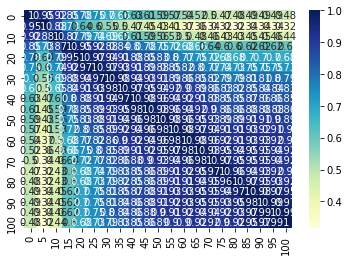

In [ ]:

dataplot = sb.heatmap(df[df.columns[5:26]].corr(), cmap="YlGnBu", annot=True)
mp.show()



In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 524 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 6.6 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 8.8 MB 47.4 MB/s 
     |████████████████████████████████| 468 kB 68.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=25172404e82da38509b0e7cf3623643edbf98bd7e2998638246cd1fda862d0bc
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df[df.columns[5:26]])
chi_square_value, p_value

(222159.5561752764, 0.0)

In [ ]:
import factor_analyzer

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(df[df.columns[5:26]])
#print(kmo_model)#OUTPUT:



(array([0.90968904, 0.86610801, 0.96668183, 0.96176718, 0.96308576,
        0.96521852, 0.96093049, 0.95470643, 0.95868129, 0.95984658,
        0.96221014, 0.96403921, 0.97055255, 0.95691927, 0.95128618,
        0.96337215, 0.96743928, 0.95402515, 0.94296778, 0.93079803,
        0.95565607]), 0.9545763933902758)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(df[df.columns[5:26]]), columns=df[df.columns[5:26]].columns)

In [ ]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=21)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

In [ ]:
scaled_df

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,-0.570061,-0.631125,-0.761672,-0.763798,-0.766987,-0.772066,-0.796313,-0.817647,-0.817959,-0.816162,...,-0.805338,-0.797026,-0.808680,-0.800202,-0.773490,-0.786383,-0.813929,-0.826943,-0.831469,-0.822842
1,-0.424013,-0.320582,-0.072637,-0.529294,-0.610155,-0.627274,-0.646855,-0.622512,-0.590587,-0.506846,...,-0.510742,-0.518214,-0.512745,-0.504578,-0.462927,-0.475806,-0.455454,-0.453456,-0.374791,-0.330805
2,-0.477033,-0.360562,-0.397572,-0.435176,-0.568181,-0.605071,-0.597553,-0.546691,-0.515119,-0.484592,...,-0.471692,-0.466994,-0.488450,-0.487696,-0.467786,-0.431340,-0.393994,-0.353036,-0.270696,-0.177796
3,-0.363495,-0.284864,-0.346277,-0.603135,-0.647006,-0.611270,-0.669173,-0.663470,-0.606825,-0.583479,...,-0.545807,-0.494122,-0.485355,-0.470005,-0.423447,-0.384977,-0.383646,-0.351068,-0.288233,-0.270412
4,-0.440562,-0.353012,-0.425914,-0.464376,-0.577990,-0.584716,-0.578937,-0.592957,-0.565954,-0.532228,...,-0.539416,-0.531329,-0.519168,-0.523673,-0.492606,-0.454509,-0.450058,-0.389834,-0.320042,-0.270463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,-0.120246,0.042226,-0.154423,-0.330033,-0.389900,-0.428062,-0.483788,-0.356840,-0.464142,-0.523386,...,-0.585695,-0.599874,-0.630174,-0.624927,-0.614978,-0.615234,-0.631683,-0.656562,-0.668891,-0.654563
3739,-0.574971,-0.458564,-0.663680,-0.698082,-0.717868,-0.719976,-0.743489,-0.764515,-0.760507,-0.771436,...,-0.766524,-0.762521,-0.774681,-0.765892,-0.741895,-0.753374,-0.780808,-0.795330,-0.798516,-0.791442
3740,-0.623952,-0.525711,-0.628712,-0.631531,-0.655196,-0.664577,-0.694903,-0.719581,-0.711615,-0.716276,...,-0.710750,-0.703556,-0.727509,-0.733280,-0.709147,-0.730370,-0.752983,-0.772060,-0.777742,-0.770170
3741,0.059382,0.034701,-0.224704,-0.256139,-0.330026,-0.454486,-0.503348,-0.568170,-0.558647,-0.612967,...,-0.633476,-0.637722,-0.649239,-0.638510,-0.630423,-0.638155,-0.655193,-0.693643,-0.712258,-0.715735


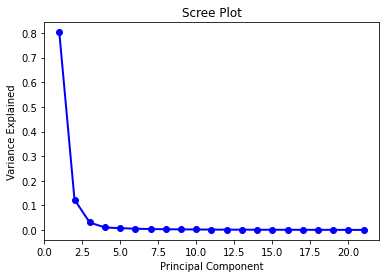

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pca.explained_variance_ratio_

array([0.80320358, 0.12312263])

Results and Discussion

In [ ]:
print("Average noise level is", dat['Mean'][:22].sum())
print("Average noise level of location 1 is", dat['meanBogoslovija-location1'][:22].sum())

print("Average noise level of location 2 is", dat['meanStudenjak-location2'][:22].sum())

print("Average noise level of location 3 is", dat['meanVStepe-location3'][:22].sum())

print("Average noise level of location 4 is", dat['meanBulevarOslobodjenja-location4'][:22].sum())
print("Average noise level of location 5 is", dat['meanJoveIlica-location5'][:22].sum())

Average noise level is 67.709485511
Average noise level of location 1 is 55.078928205000004
Average noise level of location 2 is 51.54972866699999
Average noise level of location 3 is 93.545779794
Average noise level of location 4 is 91.461135969
Average noise level of location 5 is 43.86890360300001


In [ ]:
dat.corr()[]

,Unnamed: 0,Frequency,Mean,StdDev,Variance,meanJoveIlica-location5,meanStudenjak-location2,meanVStepe-location3,meanBulevarOslobodjenja-location4,meanBogoslovija-location1,sdJoveIlica-location5,sdStudenjak-location2,sdVStepe-location3,sdBulevarOslobodjenja-location4,sdBogoslovija-location1
Unnamed: 0,1.000000,1.000000,-0.523014,0.415405,0.260295,-0.573964,-0.415030,-0.467277,-0.561775,-0.524955,-0.573964,-0.415030,-0.467277,-0.561775,-0.524955
Frequency,1.000000,1.000000,-0.523014,0.415405,0.260295,-0.573964,-0.415030,-0.467277,-0.561775,-0.524955,-0.573964,-0.415030,-0.467277,-0.561775,-0.524955
Mean,-0.523014,-0.523014,1.000000,0.442319,0.596054,0.956750,0.900344,0.992426,0.996678,0.957432,0.956750,0.900344,0.992426,0.996678,0.957432
StdDev,0.415405,0.415405,0.442319,1.000000,0.925385,0.356167,0.433048,0.487498,0.388969,0.387874,0.356167,0.433048,0.487498,0.388969,0.387874
Variance,0.260295,0.260295,0.596054,0.925385,1.000000,0.449232,0.650632,0.637321,0.547260,0.593821,0.449232,0.650632,0.637321,0.547260,0.593821
meanJoveIlica-location5,-0.573964,-0.573964,0.956750,0.356167,0.449232,1.000000,0.753402,0.946060,0.963149,0.853712,1.000000,0.753402,0.946060,0.963149,0.853712
meanStudenjak-location2,-0.415030,-0.415030,0.900344,0.433048,0.650632,0.753402,1.000000,0.877253,0.881697,0.980118,0.753402,1.000000,0.877253,0.881697,0.980118
meanVStepe-location3,-0.467277,-0.467277,0.992426,0.487498,0.637321,0.946060,0.877253,1.000000,0.987867,0.933332,0.946060,0.877253,1.000000,0.987867,0.933332
meanBulevarOslobodjenja-location4,-0.561775,-0.561775,0.996678,0.388969,0.547260,0.963149,0.881697,0.987867,1.000000,0.946303,0.963149,0.881697,0.987867,1.000000,0.946303
meanBogoslovija-location1,-0.524955,-0.524955,0.957432,0.387874,0.593821,0.853712,0.980118,0.933332,0.946303,1.000000,0.853712,0.980118,0.933332,0.946303,1.000000


Analyzing frequency values through the days of the week



In [ ]:
df[['Date','Time']]=df['datetime'].str.split('T', expand=True)

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df['day'] = df.datetime.dt.weekday

In [ ]:
df['day'].value_counts()

2    645
1    613
0    587
3    537
6    467
4    460
5    434
Name: day, dtype: int64

In [ ]:
df['0'].max()

34.99361055101795

In [ ]:
df.groupby(['day']).max()

,_id,datetime,mac,lat,lon,0,5,10,15,20,...,3165,3170,3175,3180,3185,3190,3195,Date,Time,total
day,,,,,,,,,,,,,,,,,,,,,
0,5cec41253275b,2019-05-27 21:57:25+00:00,E4:34:93:70:8F:70,44.833371,20.503865,34.993611,69.087202,78.576247,62.340694,57.182152,...,80.968934,85.450265,59.667263,56.344700,48.599171,40.574089,39.632738,2019-05-27,23:59:31Z,8645.523764
1,5cedac9e14c7c,2019-05-28 23:48:14+00:00,E4:34:93:70:8F:70,56.325344,43.991998,34.728752,76.040862,86.863198,75.402519,65.846714,...,13.987251,11.810607,48.522319,13.627106,17.071954,16.892944,32.754136,2019-05-28,23:48:14Z,7881.868294
2,5ce5c43e56cd1,2019-05-22 23:50:54+00:00,EC:10:7B:8D:D0:F2,55.826738,45.042341,12.740182,24.934035,53.369582,53.839198,47.201527,...,2.003870,2.588834,3.216463,3.780062,4.261111,4.627841,6.516555,2019-05-22,23:55:20Z,1502.901471
3,5ce708dc8c043,2019-05-23 22:55:56+00:00,E4:34:93:70:8F:70,44.834034,20.492181,9.897693,20.515805,52.337139,29.440207,29.171241,...,90.223288,83.994281,79.151475,73.905356,66.293470,55.847419,44.293000,2019-05-23,23:59:19Z,31546.067563
4,5ce812774eaf3,2019-05-24 17:49:11+00:00,E4:34:93:70:8F:70,44.834038,20.492157,14.960294,26.419428,33.429057,36.176459,42.516404,...,92.173458,4.614254,73.947844,5.140464,10.207904,12.435897,30.397656,2019-05-24,23:55:01Z,8916.857383
5,5ce9a6038c990,2019-05-25 22:30:59+00:00,F4:C2:48:2D:60:6C,53.279080,50.187678,11.386531,29.124599,38.781538,47.223201,46.580524,...,9.774399,7.035431,3.633111,4.209392,3.441429,5.203139,7.725192,2019-05-25,23:27:39Z,1752.930525
6,5ceb060e3197e,2019-05-26 23:33:02+00:00,F4:C2:48:2D:60:6C,44.826074,20.505094,11.529643,28.928573,56.635253,31.383735,30.247706,...,3.434006,5.338391,4.330935,1.609431,4.009896,4.504186,12.797754,2019-05-26,23:41:01Z,1435.933790


'0'

In [ ]:
df['total']=df[df.columns[5:-2]].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0       2019-05-08T05:09:56Z
1       2019-05-08T07:00:25Z
2       2019-05-08T07:01:46Z
3       2019-05-08T07:03:10Z
4       2019-05-08T07:04:24Z
                ...         
3738    2019-05-28T19:37:48Z
3739    2019-05-28T19:50:18Z
3740    2019-05-28T23:10:02Z
3741    2019-05-28T23:45:49Z
3742    2019-05-28T23:48:14Z
Name: datetime, Length: 3743, dtype: object

Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, [3,4]].values
X

array([[ 2.01433188,  4.05753293],
       [ 4.62662996, 21.40570477],
       [ 6.93034481, 48.02967925],
       ...,
       [ 1.5159232 ,  2.29802316],
       [ 1.3658987 ,  1.86567927],
       [ 1.89691779,  3.59829711]])

In [ ]:
import scipy.cluster.hierarchy as sch

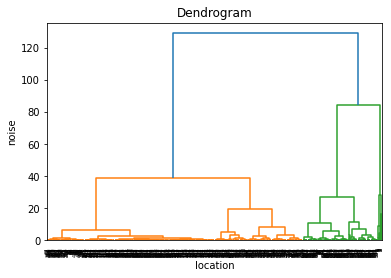

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('location')
plt.ylabel('noise')
plt.show()